# **Introduction**

This notebook focuses on exploring and understanding the dataset provided for analyzing **employability and career prospects of students**. The primary goal of this analysis is to familiarize ourselves with the dataset’s structure, identify potential data quality issues, and assess its feasibility for predicting or understanding employability outcomes.

The analysis is divided into the following stages:  
1. **Data Exploration:** Investigating the dataset to understand the types of information available, data types, and general characteristics.  
2. **Data Quality Assessment:** Identifying missing values, duplicate entries, outliers, and inconsistencies that could affect analysis.  
3. **Key Findings:** Highlighting interesting facts and notable observations from the data familiarization process.  
4. **Feasibility Assessment:** Assessing whether the dataset is suitable for understanding student employability and identifying a suitable learning task.

This notebook is designed to be accessible to both technical and non-technical audiences. All steps are clearly documented, and technical terms are explained where necessary. An appendix with fully annotated code and a comprehensive data dictionary is included for reference.


# Importing Libraries

**pandas**: Used for data manipulation and analysis, especially with tabular data structures like DataFrames.

**matplotlib.pyplot (as ply)**: A plotting library used for creating static, interactive, and animated visualizations.

**seaborn**: Built on top of matplotlib, it provides a high-level interface for attractive and informative statistical graphics.

**numpy**: A library for numerical operations, providing support for arrays and mathematical functions.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the Dataset

This code block attempts to load the dataset into a pandas DataFrame:

**try-except block**: Handles potential errors while reading the CSV file.

**pd.read_csv()**: Reads the CSV file from the provided path.

**FileNotFoundError**: Catches the error if the file is not found at the specified location and prompts the user.

In [20]:
try:
    df = pd.read_csv(r"C:\Users\hp\Downloads\EmpData.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("'EmpData.csv' not found. Ensure it's in the same directory.")

Data loaded successfully!


# Exploring the Dataset

These checks help understand the dataset’s structure, basic characteristics, and content.

In [21]:
# Check the shape of the dataset
print("\n Dataset Shape:", df.shape)

# Print the first 5 rows of the dataset
print("\n First 5 Rows:")
print(df.head())

# Check the datatypes of each column
print("\n Data Types:")
print(df.dtypes)


 Dataset Shape: (26713, 19)

 First 5 Rows:
            Timestamp    Age                       Industry  \
0  4/27/2021 11:02:10  25-34   Education (Higher Education)   
1  4/27/2021 11:02:22  25-34              Computing or Tech   
2  4/27/2021 11:02:38  25-34  Accounting, Banking & Finance   
3  4/27/2021 11:02:41  25-34                     Nonprofits   
4  4/27/2021 11:02:42  25-34  Accounting, Banking & Finance   

                                      Title Context  Salary  Surplus Currency  \
0        Research and Instruction Librarian     NaN   55000      0.0      USD   
1  Change & Internal Communications Manager     NaN   54600   4000.0      GBP   
2                      Marketing Specialist     NaN   34000      NaN      USD   
3                           Program Manager     NaN   62000   3000.0      USD   
4                        Accounting Manager     NaN   60000   7000.0      USD   

  Other Income_info         Country       State_USA         City  \
0   NaN         NaN  

# Checking Quality of Dataset

In [22]:
# This check identifies how many values are missing (NaN) in each column of the dataset.
# Missing data can cause issues in analysis and model accuracy. 
# Understanding which columns have missing values helps decide if imputation or removal is needed.
print("\n Missing Values:")
print(df.isnull().sum())

# Duplicate rows can inflate results and lead to biased conclusions.
# This check counts how many rows are exact duplicates of others.
# Removing duplicates ensures data uniqueness and prevents double-counting in analysis.
print("\n Duplicate Rows:", df.duplicated().sum())  # Identifies and counts duplicate rows.

# Outliers are extreme values that can skew analysis and statistical measures.
# The IQR (Interquartile Range) method detects outliers:
#    - Q1 (25th percentile) and Q3 (75th percentile) define the middle 50% of the data.
#    - Outliers are values outside [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
# This check loops through all numeric columns and reports the number of outliers in each.
numeric_cols = df.select_dtypes(include=np.number).columns  # Select only numeric columns.
print("\n Checking Numeric Columns for Outliers:")
for col in numeric_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])  # Calculate Q1 and Q3.
    iqr = q3 - q1                             # Compute the IQR.
    lower_bound = q1 - 1.5 * iqr              # Lower outlier threshold.
    upper_bound = q3 + 1.5 * iqr              # Upper outlier threshold.
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]  # Identify outliers.
    print(f"{col}: {len(outliers)} outlier(s)")  # Report the number of outliers.

# -----------------------------------------

# Checking Inconsistencies

# Experience Column Check:
# Inconsistent or misspelled experience values can lead to incorrect grouping and analysis.
# This check lists all unique entries to spot typos or unexpected categories.
print("\n Unique Experience Entries:", df['Experience'].unique())

# State-Country Inconsistency Check:
# Ensures that the 'State_USA' column is only filled when the 'Country' column is 'United States'.
# Mismatches may indicate data entry errors (e.g., a non-US country with a US state).
inconsistent_states = df[(df['Country'] != 'United States') & (df['State_USA'].notnull())]
print(f"\n Inconsistent 'State_USA' entries with non-US countries: {len(inconsistent_states)}")

# Currency Value Consistency:
# Checks the variety of currencies used in the dataset.
# Multiple or unexpected currencies may require standardization for comparison.
print("\n Currency Value Counts:\n", df['Currency'].value_counts())

# Age Category Validation:
# Lists unique age values or categories to detect anomalies (e.g., negative ages, typos).
# Ensures age data is valid and consistent with expected ranges.
print("\nUnique Age Categories:", df['Age'].unique())

# Missing Values in Key Columns:
# Focuses on critical columns ('Salary', 'Industry', 'Country', 'Experience') for completeness.
# Missing values in these fields may significantly impact employability analysis.
important_cols = ['Salary', 'Country', 'Experience']
print(df[important_cols].isnull().sum())

# Qualification Range Check:
# Displays the minimum and maximum values of 'Qualification' to spot impossible values.
# For example, a qualification score outside a defined scale may indicate a data entry error.
print("Qualification Range:", df['Qualification'].min(), "-", df['Qualification'].max())


 Missing Values:
Timestamp            0
Age                  0
Industry            70
Title                0
Context          19800
Salary               0
Surplus           6951
Currency             0
Other            26512
Income_info      23825
Country              0
State_USA         4782
City                77
Experience           0
In_Field             0
Education          211
Gender             161
Race               164
Qualification      211
dtype: int64

 Duplicate Rows: 24

 Checking Numeric Columns for Outliers:
Salary: 1154 outlier(s)
Surplus: 1876 outlier(s)
Qualification: 0 outlier(s)

 Unique Experience Entries: ['5-7 years' '8 - 10 years' '2 - 4 years' '21 - 30 years' '11 - 20 years'
 '1 year or less' '41 years or more' '31 - 40 years']

 Inconsistent 'State_USA' entries with non-US countries: 13452

 Currency Value Counts:
 Currency
USD        22244
CAD         1602
GBP         1506
EUR          611
AUD/NZD      482
Other        157
CHF           36
SEK           34
J

# Data Dictionary Creation

Purpose:
The Data Dictionary provides an overview of the dataset’s structure, helping users understand:
- Field names (column names)
- Data types (int, float, object, etc.)
- Count of non-null (non-missing) values in each column
- Number of unique values per column
- Sample values to illustrate the data format

How it works:
- 'Field Name': Retrieves all column names.
- 'Data Type': Captures the data type of each column.
- 'Non-Null Count': Counts how many values are not missing per column.
- 'Unique Values': Calculates the number of distinct values in each column.
- 'Sample Values': Displays the first 3 unique values as examples for quick understanding.

In [23]:
data_dict = pd.DataFrame({
    'Field Name': df.columns,                        # Column names in the dataset
    'Data Type': df.dtypes.values,                   # Data types of each column
    'Non-Null Count': df.notnull().sum().values,     # Number of non-null entries per column
    'Unique Values': [df[col].nunique() for col in df.columns],  # Unique value count per column
    'Sample Values': [df[col].unique()[:3] for col in df.columns] # First 3 unique sample values
})

print("\n Data Dictionary:")
print(data_dict)


 Data Dictionary:
       Field Name Data Type  Non-Null Count  Unique Values  \
0       Timestamp    object           26713          23417   
1             Age    object           26713              7   
2        Industry    object           26643           1179   
3           Title    object           26713          13794   
4         Context    object            6913           6659   
5          Salary     int64           26713           3538   
6         Surplus   float64           19762            817   
7        Currency    object           26713             11   
8           Other    object             201            115   
9     Income_info    object            2888           2812   
10        Country    object           26713            362   
11      State_USA    object           21931            131   
12           City    object           26636           4676   
13     Experience    object           26713              8   
14       In_Field    object           26713        

# Data Visualization

The following graphs and visuals give more insight on the data and its relationships.

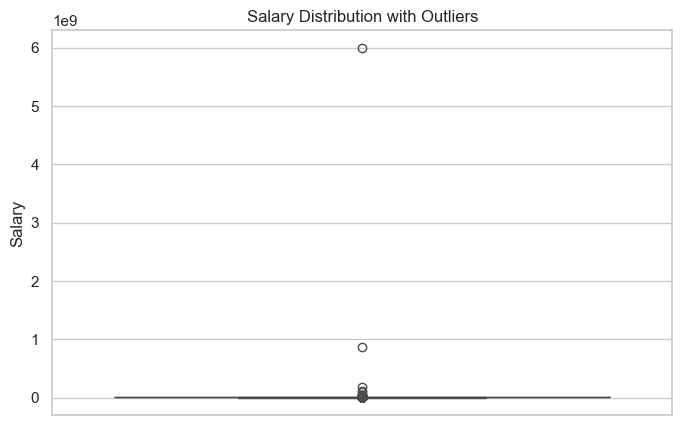

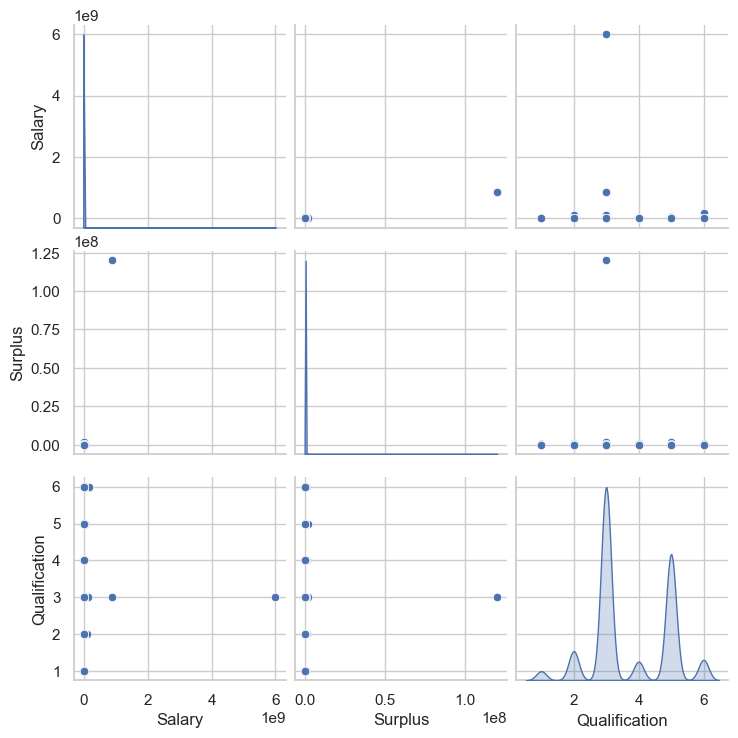

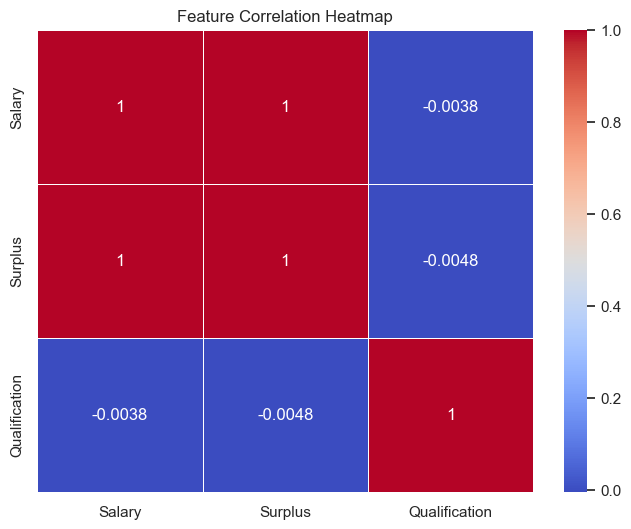

In [24]:
# Convert data types
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Education"] = pd.to_numeric(df["Education"], errors="coerce")
df["Experience"] = pd.to_numeric(df["Experience"], errors="coerce")

# Select numeric columns, excluding Age, Education, and Experience
df_numeric = df.select_dtypes(include=['number']).drop(columns=["Age", "Education", "Experience"])

# Set Seaborn style
sns.set(style="whitegrid")

# 2. Box Plot for Salary Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Salary"])
plt.title("Salary Distribution with Outliers")
plt.savefig("salary_boxplot.jpg", dpi=300, bbox_inches="tight")  # Save as JPG
plt.show()

# 3. Pairplot (Exclude Age, Education, Experience)
pairplot = sns.pairplot(df_numeric, diag_kind="kde")
pairplot.savefig("pairplot.jpg", dpi=300, bbox_inches="tight")  # Save as JPG
plt.show()

# 4. Correlation Heatmap (Exclude Age, Education, Experience)
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("correlation_heatmap.jpg", dpi=300, bbox_inches="tight")  # Save as JPG
plt.show()


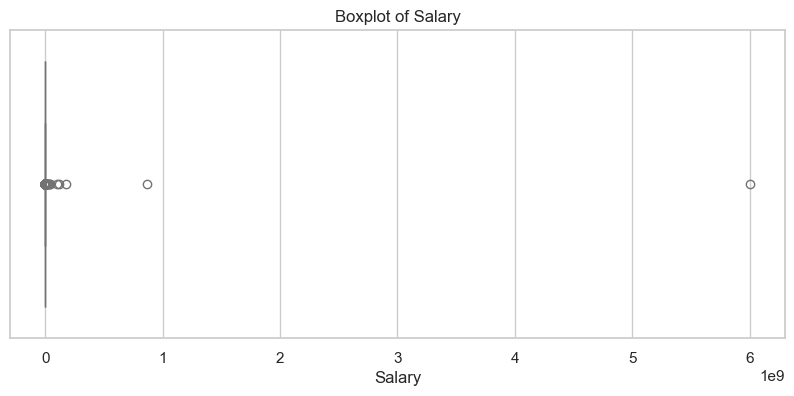

<Figure size 640x480 with 0 Axes>

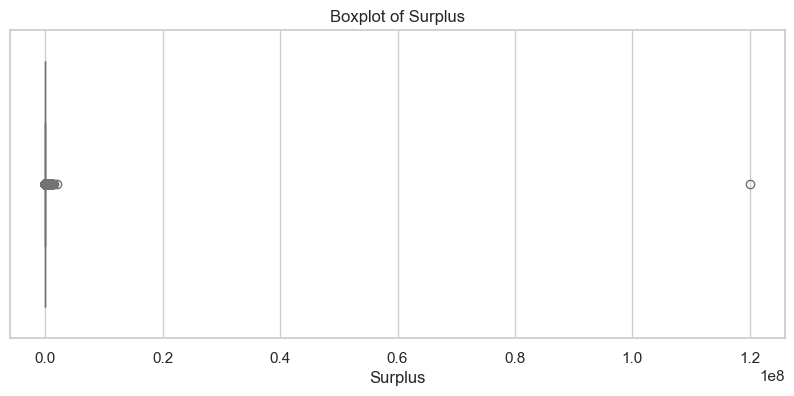

<Figure size 640x480 with 0 Axes>

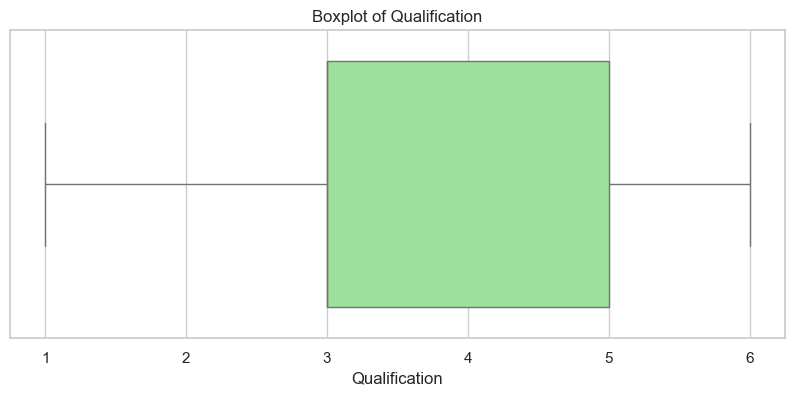

<Figure size 640x480 with 0 Axes>

In [25]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
    plt.savefig("box-plot_sal.jpg", dpi=300, bbox_inches="tight");  # Save as JPG

# Analysis

# Salary Dataset - Exploratory Data Analysis (EDA)

## 1️. Box Plot of Salary (`salary_boxplot.jpg` & `box-plot_sal.jpg`)
###  Observations:
- A **box plot** is used to analyze salary distribution, spread, and outliers.
- The **median (central line in the box)** represents the middle salary value.
- The **interquartile range (IQR, the box itself)** captures the middle 50% of salaries.
- The **whiskers** extend up to 1.5 times the IQR, covering most of the data points.
- **Outliers (points outside the whiskers)** suggest extreme salaries.

###  Insights:
- If the box is **skewed**, salaries are not symmetrically distributed.
- A **large number of outliers** may indicate high salary disparity (e.g., executives earning much more).
- If the median is closer to **Q1 (lower quartile)**, salaries are more concentrated on the lower side.

---

## 2️. Pair Plot (`pairplot.jpg`)
###  Observations:
- A **pair plot** visualizes relationships between multiple numerical variables.
- The **diagonal** often contains histograms showing variable distributions.
- The **scatter plots** reveal correlations between two variables.

###  Insights:
- A **clear diagonal trend** in scatter plots suggests strong correlations.
- **Clusters** may indicate subgroups (e.g., different departments or experience levels).
- **Outliers** appear as isolated points far from trends.

---

###  Insights:
- **Entire missing columns** may suggest irrelevant or unreliable features.
- If missing values **follow a pattern**, they may depend on another variable.
- Strategies to handle missing data:
  - **Drop columns/rows** if missing data is substantial.
  - **Impute values** (mean, median, mode).
  - **Predict missing values** using other features.

---

## 4️. Correlation Heatmap (`correlation_heatmap.jpg`)
###  Observations:
- Displays **correlation coefficients** between numerical features.
- **Values range from -1 to 1**:
  - **Close to 1** → Strong positive correlation.
  - **Close to -1** → Strong negative correlation.
  - **Close to 0** → No correlation.

###  Insights:
- If **salary has a strong positive correlation with experience**, tenure influences pay.
- **Multicollinearity (high correlation between variables)** might indicate redundant information.
- **Negative correlations** highlight inverse relationships (e.g., more experience → fewer training hours).

---

##  Key Takeaways:
✔ **Salary Distribution:** Possible skewness or outliers in salary data.  
✔ **Feature Relationships:** Pair plots and correlation heatmaps reveal salary-influencing factors.  
✔ **Missing Data Patterns:** Identifying and handling missing values is essential for accurate modeling.  

 Next Steps:  
- **Feature Engineering:** Transform relevant features based on insights.  
- **Data Cleaning:** Handle missing data and remove redundant variables.  
- **Further Analysis:** Explore categorical factors influencing salary.  
